
🧪 KS Test Results:
                         KS Statistic   p-value
diagnosis                    0.000879  1.000000
radius_mean                  0.030756  0.862136
texture_mean                 0.040422  0.560589
perimeter_mean               0.032513  0.813553
area_mean                    0.035149  0.732390
smoothness_mean              0.027241  0.938741
compactness_mean             0.048330  0.334874
concavity_mean               0.057118  0.166127
concave points_mean          0.067663  0.061069
symmetry_mean                0.049209  0.313991
fractal_dimension_mean       0.033392  0.787383
radius_se                    0.080844  0.013765
texture_se                   0.036028  0.703996
perimeter_se                 0.066784  0.066813
area_se                      0.094903  0.002097
smoothness_se                0.043937  0.452612
compactness_se               0.064148  0.086879
concavity_se                 0.043937  0.452612
concave points_se            0.021968  0.992542
symmetry_se         

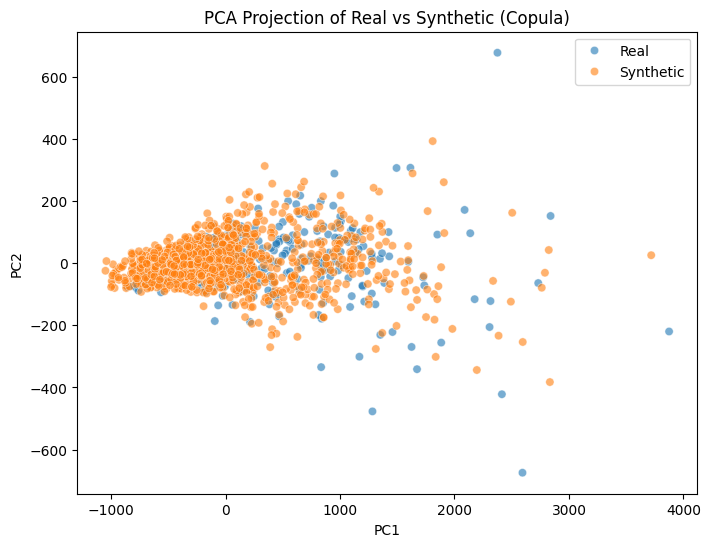

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp, chi2_contingency
from sklearn.metrics import mutual_info_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load your real and copula-based synthetic data
real_df = pd.read_csv("C:/Users/jhumu/Downloads/data.csv").drop(columns=["Unnamed: 32", "id"], errors='ignore')
synthetic_df = pd.read_csv("C:/Users/jhumu/Regular Use/JupyNote/synthetic_data_copula_fixed.csv")

# Encode diagnosis if needed
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
real_df['diagnosis'] = le.fit_transform(real_df['diagnosis'])
synthetic_df['diagnosis'] = le.fit_transform(synthetic_df['diagnosis'])

# ==== 1. Kolmogorov–Smirnov (KS) Test for numeric columns ====
ks_results = {}
for col in real_df.select_dtypes(include='number').columns:
    stat, p = ks_2samp(real_df[col], synthetic_df[col])
    ks_results[col] = {"KS Statistic": stat, "p-value": p}

print("\n🧪 KS Test Results:")
print(pd.DataFrame(ks_results).T)

# ==== 2. Chi-Square Test for categorical columns ====
chi2_results = {}
for col in real_df.select_dtypes(include='object').columns:
    real_freq = real_df[col].value_counts()
    synth_freq = synthetic_df[col].value_counts()
    aligned = pd.concat([real_freq, synth_freq], axis=1).fillna(0)
    stat, p, _, _ = chi2_contingency(aligned.T)
    chi2_results[col] = {"Chi2 Statistic": stat, "p-value": p}

if chi2_results:
    print("\n🧪 Chi-Square Test Results:")
    print(pd.DataFrame(chi2_results).T)
else:
    print("\nℹ️ No object-type columns found for Chi-Square Test.")

# ==== 3. Correlation Matrix Comparison ====
def correlation_diff(real, synthetic):
    corr_real = real.corr()
    corr_synth = synthetic.corr()
    diff = np.abs(corr_real - corr_synth)
    return diff

print("\n📊 Correlation Difference (avg abs diff):", correlation_diff(real_df, synthetic_df).mean().mean())

# ==== 4. Optional: Visual PCA (2D embedding) ====
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
combined = pd.concat([real_df, synthetic_df])
labels = ['Real'] * len(real_df) + ['Synthetic'] * len(synthetic_df)
embedding = pca.fit_transform(combined)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=labels, alpha=0.6)
plt.title("PCA Projection of Real vs Synthetic (Copula)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()



🧪 KS Test Results:
                         KS Statistic        p-value
diagnosis                    0.112917   1.701050e-05
radius_mean                  0.393234   1.686015e-63
texture_mean                 0.079525   6.096026e-03
perimeter_mean               0.268453   2.392824e-29
area_mean                    0.103251   1.152816e-04
smoothness_mean              0.183216   8.306168e-14
compactness_mean             0.131371   2.728871e-07
concavity_mean               0.101054   1.738616e-04
concave points_mean          0.203866   5.146897e-17
symmetry_mean                0.359402   7.681581e-53
fractal_dimension_mean       0.243849   3.107607e-24
radius_se                    0.323814   9.047888e-43
texture_se                   0.246485   9.315423e-25
perimeter_se                 0.133128   1.781416e-07
area_se                      0.185852   3.384182e-14
smoothness_se                0.368629   1.215940e-55
compactness_se               0.326889   1.353541e-43
concavity_se              

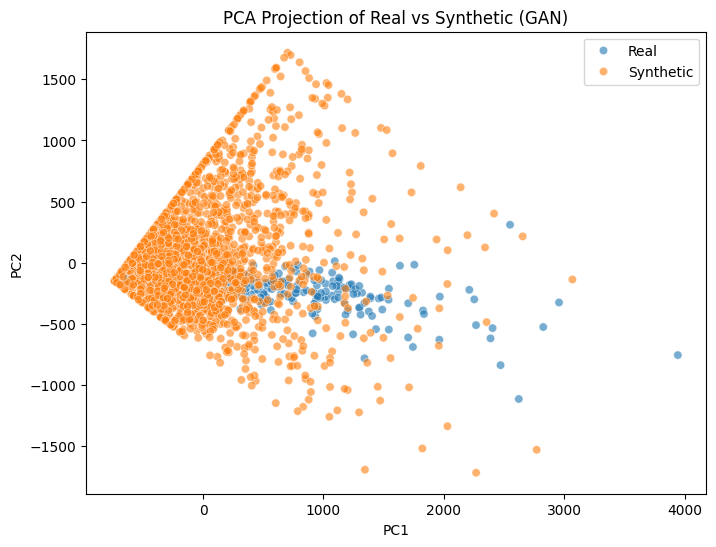

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp, chi2_contingency
from sklearn.metrics import mutual_info_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load your real and copula-based synthetic data
real_df = pd.read_csv("C:/Users/jhumu/Downloads/data.csv").drop(columns=["Unnamed: 32", "id"], errors='ignore')
synthetic_df = pd.read_csv("C:/Users/jhumu/Regular Use/JupyNote/synthetic_data_ctgan_improved.csv")

# Encode diagnosis if needed
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
real_df['diagnosis'] = le.fit_transform(real_df['diagnosis'])
synthetic_df['diagnosis'] = le.fit_transform(synthetic_df['diagnosis'])

# ==== 1. Kolmogorov–Smirnov (KS) Test for numeric columns ====
ks_results = {}
for col in real_df.select_dtypes(include='number').columns:
    stat, p = ks_2samp(real_df[col], synthetic_df[col])
    ks_results[col] = {"KS Statistic": stat, "p-value": p}

print("\n🧪 KS Test Results:")
print(pd.DataFrame(ks_results).T)

# ==== 2. Chi-Square Test for categorical columns ====
chi2_results = {}
for col in real_df.select_dtypes(include='object').columns:
    real_freq = real_df[col].value_counts()
    synth_freq = synthetic_df[col].value_counts()
    aligned = pd.concat([real_freq, synth_freq], axis=1).fillna(0)
    stat, p, _, _ = chi2_contingency(aligned.T)
    chi2_results[col] = {"Chi2 Statistic": stat, "p-value": p}

if chi2_results:
    print("\n🧪 Chi-Square Test Results:")
    print(pd.DataFrame(chi2_results).T)
else:
    print("\nℹ️ No object-type columns found for Chi-Square Test.")

# ==== 3. Correlation Matrix Comparison ====
def correlation_diff(real, synthetic):
    corr_real = real.corr()
    corr_synth = synthetic.corr()
    diff = np.abs(corr_real - corr_synth)
    return diff

print("\n📊 Correlation Difference (avg abs diff):", correlation_diff(real_df, synthetic_df).mean().mean())

# ==== 4. Optional: Visual PCA (2D embedding) ====
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
combined = pd.concat([real_df, synthetic_df])
labels = ['Real'] * len(real_df) + ['Synthetic'] * len(synthetic_df)
embedding = pca.fit_transform(combined)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=labels, alpha=0.6)
plt.title("PCA Projection of Real vs Synthetic (GAN)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
